In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="i7whSwXvC3zzUKabfGLE969IU",
    project_name="movie-recommender-team-13",
    workspace="jtsiri10",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\sjtsi\\Documents\\unsupervised\\train.csv' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jtsiri10/movie-recommender-team-13/098fa246315a488694253c85db949e15



# Project : Movie Recommender system
<img src = 'Image_header.png'>

### Team members
 1. Joas Tsiri
 2. Cassie Kguger
 3. Nthabiseng Moloisi
 4. Rizqah Miniers
 5. Tshiamo Nthite

Due Date: 03/02/2021

© Explore Data Science Academy

<b><h1>Table of contents</h1> </b>
    <ol><li> <a href = '##1 Introduction'> Introduction</a></li>
        <li><a>Importing libraries</a></li>
    <li><a>loading and visualizing datasets<a/> </li>
        <li><a>Merging the datasets</a></li>
        <li><a>Explanatory Data Analysis</a></li>
    <li><a>Mrging Datasets</a></li><ul>
  <li><a>Movie Recommendation Model-based</a></li> 
        <ul><a> SVD </a></ul>
        <ul><a> KNN </a></ul>
    <li><a>Streamlit video</a></li>
        <li><a>Conclusion</a></li>
        <li><a>Link to Streamlit video and kaggle submission</a></li>
        <li><a>References</a></li>
    
</ol>

## 1. Introduction

<p align="justify">The expansion of information on the internet provides a wide range of options while also increasing the complexity of what the user is looking for. To compensate for this complexity, the recommendation system employs machine learning to analyze the user's past preferences.
A recommender system can be used in a variety of contexts, including marketing and consumer websites. For an example, when one uses the Takealot website to order a product, the site will recommend other products based on what others have purchased. A recommender system is essentially a system that takes the user's selection as input and predicts all of the related movies, news, books, and so on. </p>

<p align="justify">There are primarily two types of recommender systems, with a third possibly combining the first two. The first is collaborative filtering and the second is content filtering. Collaborative filtering builds a model based on the previous behavior of a user (past purchases) and similar users. Personalized recommendations are often generated by collaborative filtering. Netflix, iTunes, YouTube, Amazon, and IMDB all use collaborative filtering. We will concentrate on the collaborative filtering approach in this project, which means that the user will be recommended items that people with similar preferences rated in the past.</p>

<p>In the first part, we will learn about EDA and recommender systems, and we will create a Movie Recommender System (Content-based Filtering). Secondly, we will deploy the model to the streamlit  website and get live predictions.</p>

### Importing libraries

In [2]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

#to merge dataframes
from functools import reduce

#function to view dataframes side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Ignore warnings 
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
    
# Building recommender systems
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#libraries to preprocess data
import nltk
import itertools
from nltk.corpus import stopwords
import string
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split
# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

### Loading and visualizing datasets

In [3]:
#loading data 
rating = pd.read_csv('train.csv')
tags = pd.read_csv('tags.csv')
movies= pd.read_csv('movies.csv')
imbd_data = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores =pd.read_csv('genome_scores.csv')
test = pd.read_csv('test.csv')
#imbd_data =pd.read_csv('imdb_data.csv')
links= pd.read_csv('links.csv')

# visualize the dataset
display_side_by_side(rating.head(2),movies.head(2),imbd_data.head(1), tags.head(2),genome_tags.head(2),
                     genome_scores.head(2),links.head(2),titles =
                   ['rating','movies','imbd_data', 'tags', 'genome_tags', 'genome_scores', 'links'])

rating 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 movies 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 imbd_data 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 tags 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 genome_tags 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 genome_scores 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 links 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0

The timestamp on the train dataset seems to be of no use as such it will be droped

In [4]:
rating.drop(['timestamp'], axis=1, inplace=True)
#train.head()
#to save memory this code will not be ran

In [5]:
print(f"genome_tags shape is {genome_tags.shape}")
print(f"genome_scores shape is {genome_scores.shape}")
print(f"movies shape is {movies.shape}")
print(f"imbd_data shape is {imbd_data.shape}")
print(f"links shape is {links.shape}")
print (f'rating shape is{rating.shape}')#print(train.iloc[::250000, :])
print (f'tags shape is{tags.shape}')

genome_tags shape is (1128, 2)
genome_scores shape is (15584448, 3)
movies shape is (62423, 3)
imbd_data shape is (27278, 6)
links shape is (62423, 3)
rating shape is(10000038, 3)
tags shape is(1093360, 4)


In [5]:
#check null values of the datasets
print(f"genome_tags null values is: {genome_tags.isnull().mean()*100}")
print(f"genome_scores null values is: {genome_scores.isnull().mean()*100}")
print(f"movies shape null values is: {movies.isnull().mean()*100}")
print(f"imbd_data null values is: {imbd_data.isnull().mean()*100}")
print(f"links null values is: {links.isnull().mean()*100}")
print (f'rating null values is:{rating.isnull().mean()*100}')
print (f'tags null values is:{tags.isnull().mean()*100}')

genome_tags null values is: tagId    0.0
tag      0.0
dtype: float64
genome_scores null values is: movieId      0.0
tagId        0.0
relevance    0.0
dtype: float64
movies shape null values is: movieId    0.0
title      0.0
genres     0.0
dtype: float64
imbd_data null values is: movieId           0.000000
title_cast       36.908864
director         36.197668
runtime          44.317765
budget           71.016937
plot_keywords    40.611482
dtype: float64
links null values is: movieId    0.000000
imdbId     0.000000
tmdbId     0.171411
dtype: float64
rating null values is:userId     0.0
movieId    0.0
rating     0.0
dtype: float64
tags null values is:userId       0.000000
movieId      0.000000
tag          0.001463
timestamp    0.000000
dtype: float64


<b> Observations </b>

The datasets are large, with over 10 million records in the train, tags, and genome tags. This may cause processing issues because it takes time to run on the personal computer. It can also be seen that imbd dataframe has highly significant missing values on all features with a percentage greater than 30%. In addition, the tag dataFrame feature 'tag' has insignificant missing values.

### Explanatory Data Anaysis
For our EDA we will answer the following:

1. counts of each rating
2. rating frequency of each movie
3. The most rated movie
4. most rated genre and
5. plot word cloud most rated 


In [6]:
num_users = len(rating.userId.unique())
num_items = len(rating.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 162541 unique users and 48213 unique movies in this data set


In [7]:
#get count
df_ratings_count = pd.DataFrame(rating.groupby('rating').size(), columns=['count'])
df_ratings_count

,count
rating,
0.5,157571
1.0,311213
1.5,159731
2.0,656821
2.5,505578
3.0,1959759
3.5,1270642
4.0,2652977
4.5,880516


In [9]:
#total ratings
total_cnt = df_ratings_count['count'].sum()
total_cnt

10000038

All of the movies in the dataset have been rated, there are no movies with a rating of zero. We can proceed and plot a bar graph to visualise the counts per rating.

<AxesSubplot:xlabel='rating'>

<Figure size 720x360 with 0 Axes>

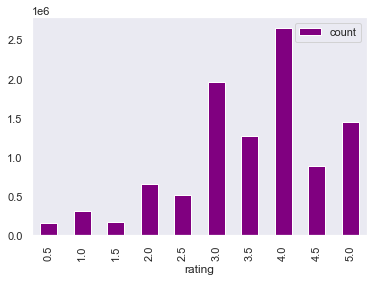

In [10]:
#plotting bar chart to represent count per rating category
plt.figure(figsize =(10,5))

pd.DataFrame(rating.groupby('rating').size(), columns=['count']).plot(kind ='bar', color = 'purple')



The highest rated category, according to the chart, is 4.0. We now want to visualize the rating per movieId.

In [11]:
# get rating frequency
df_movies_cnt = pd.DataFrame(rating.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,23062
2,9654
3,4727
4,968
5,4648


In [11]:
#takes time
#pd.DataFrame(rating.groupby('movieId').size(), columns=['count']).plot(kind ='bar', color = 'orange')

Text(0, 0.5, 'number of ratings')

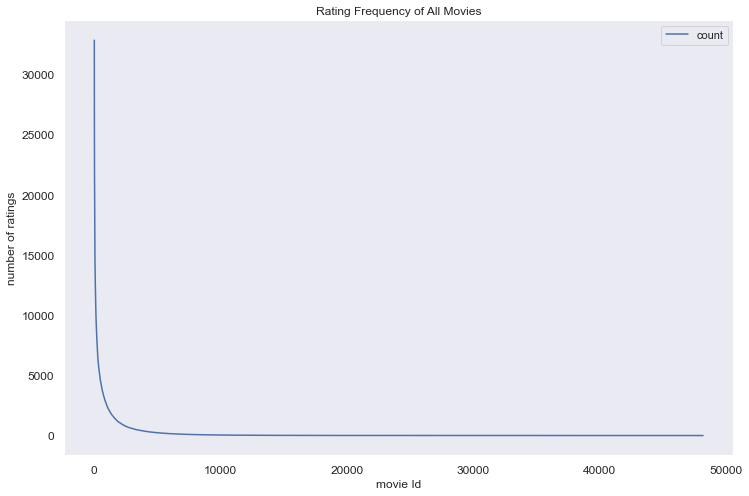

In [12]:
# plot rating frequency of all movies
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

The distribution of movie ratings frequently satisfies a property known as the long-tail property in real-world settings. The long tail property is supported by two hypotheses: the first is that the majority of consumers consistently follow the crowd and only a minority are interested in niche content; the second is that everyone is a bit eccentric, consuming both popular and specialty products. We discovered that the first hypothesis was correct. The vast majority of movies are rarely rated. As a result, the underlying ratings have a highly skewed distribution. Let's look at the movie distribution quartiles by rating now.

In [13]:
df_movies_cnt['count'].quantile(np.arange(1, 0.4, -0.1))


1.0    32831.0
0.9      252.0
0.8       49.0
0.7       15.0
0.6        7.0
0.5        4.0
Name: count, dtype: float64

We can see that approximately 1% of movies have 32831 ratings, 10% have 252, 20% have 49, and 50% have four ratings. Because we have so many movies, we'll limit it to the top 25%. We want to limit our dataset to roughly 33147 movies for two reasons.
We don't want the "MemoryError" to occur during model training.
1. Improve model performance: less well-known films have fewer ratings, making the pattern noisier.
2. Reducing the number of movies you watch can help you make better recommendations.

In [14]:
# filter data
popularity_thres = 48
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = rating[rating.movieId.isin(popular_movies)]

print('shape of original ratings data: ', rating.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (10000038, 3)
shape of ratings data after dropping unpopular movies:  (9752048, 3)


Even after removing 75% of the movies from our dataset, we still have a very large dataset. As a result, we can now filter users to further reduce the size of the data.

In [15]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,26
2,72
3,250
4,87
5,35


In [16]:
df_users_cnt['count'].quantile(np.arange(1, 0.4, -0.1))


1.0    3287.0
0.9     140.0
0.8      80.0
0.7      53.0
0.6      38.0
0.5      28.0
Name: count, dtype: float64

When popular movies are viewed, a similar pattern is observed with active users. We can see that approximately 1% of users (3277), 10% of approximately 140, 20% with 80 users, and 70% with 53 users. This will be our arbitrary threshold for removing users with few ratings.

In [17]:
# filter data
ratings_thres = 53
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]

print('shape of original ratings data: ', rating.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (10000038, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (7285651, 3)


In [18]:
new_df =df_ratings_drop_users.copy()

To get more insights into the datasets we need to merge datesets to create one dataframe. We will start with the movies and the new_df

###  Merging datasets 

In [19]:
#To get more insights on the dataframes
#we will use the original ratings dataframe since new_df has been altered
movie_df = pd.merge(rating,movies, on  = 'movieId')
movie_df

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...
10000033,84146,107912,3.0,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,Guys & Balls (2004),Comedy|Romance


In [20]:
#dataframe for average rating
avg_movie_df = movie_df.groupby('title')['rating'].mean().sort_values(ascending = False).reset_index().rename(columns= {'rating': 'average_rating'})
movies_ranting_count = movie_df.groupby('title')['rating'].count().sort_values(ascending = True).reset_index().rename(columns= {'rating': 'rating_count'})
#meging the two dataframes
movies_rating_count_df = movies_ranting_count.merge(round(avg_movie_df,0), on= 'title')
movies_rating_count_df

,title,rating_count,average_rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1,3.0
1,Love's Coming (2014),1,2.0
2,Love's Brother (2004),1,2.0
3,Love's Abiding Joy (2006),1,4.0
4,Love on the Dole (1941),1,3.0
...,...,...,...
48146,"Matrix, The (1999)",29014,4.0
48147,"Silence of the Lambs, The (1991)",29444,4.0
48148,Pulp Fiction (1994),31697,4.0
48149,Forrest Gump (1994),32383,4.0


From the plot above we can see that the most rated or liked movie is Shawshank Redemption with average rating of 4.0 and Love's coming together with Love;s brother with average rating of 2.0.

<AxesSubplot:xlabel='rating', ylabel='Count'>

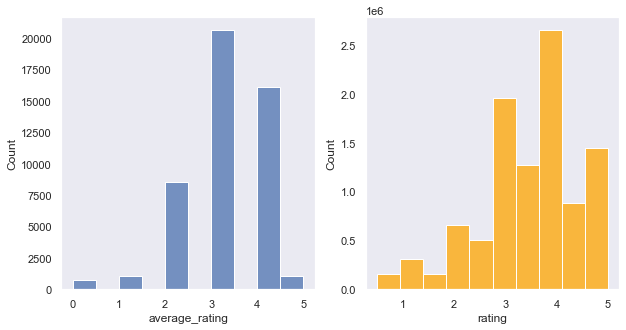

In [21]:
plt.figure(figsize =(10,5))
plt.subplot(1,2, 1)
sns.histplot(data= movies_rating_count_df, x= 'average_rating', bins = 10)

plt.subplot(1,2, 2)
sns.histplot(data= movie_df, x= 'rating', bins = 10, color= 'orange')



Observation: The plots show that the rating distribution is different. When the rating is taken without the average, there are a large number of rated movies, which can lead to the bias of thinking a movie is highly rated when it was only rated by a few people. The change has been effected into the new_df, where inactive users and low rated movies are removed.

To get insights about who is the most director, movie genre we need to merge the following datasets

In [22]:
df = imbd_data[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


Now we need to manipulate the columns that we call be able to call them as strings

In [23]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

We can now handle the strings from the data, now we create a fuction that will be able to call the wordclouds

In [24]:
def wordcloud_generator(df, column):  
    """
    This function extracts all the unique keywords in a column
    and counts the number of times each keyword occurs in the column
    while ignoring words that are not meaningful.
    these keywords are then used to generate a word cloud 
    
    Input: df
           datatype: DataFrame
           column
           datatype: str
           
    Output: wordcloud
            Datatype: None
            
    """    
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Greens').generate_from_frequencies(words)

    return wordcloud 

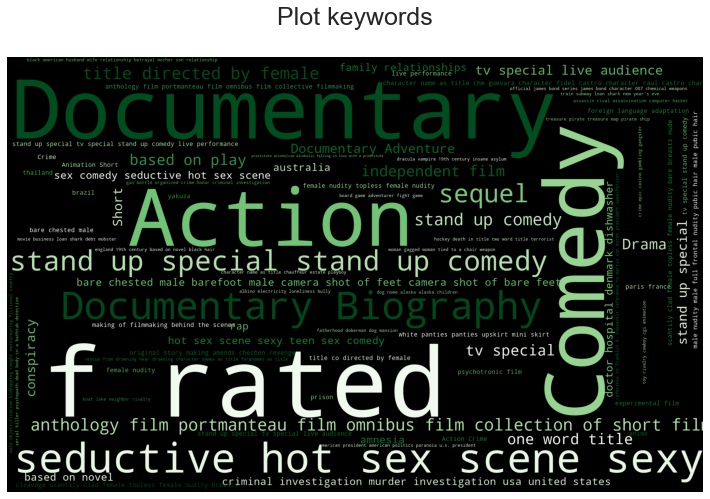

In [25]:
# Plot wordcloud
plot_keywords = wordcloud_generator(df, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

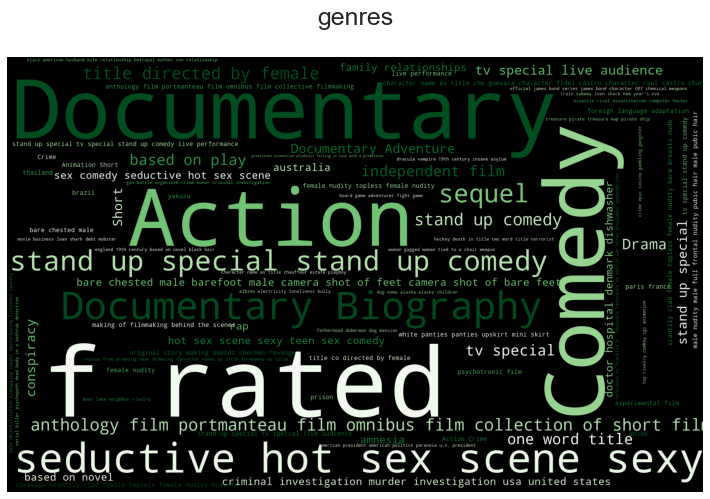

In [26]:
# Plot genres
plot_genres = wordcloud_generator(df, 'genres')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('genres\n', fontsize=25)
plt.show()

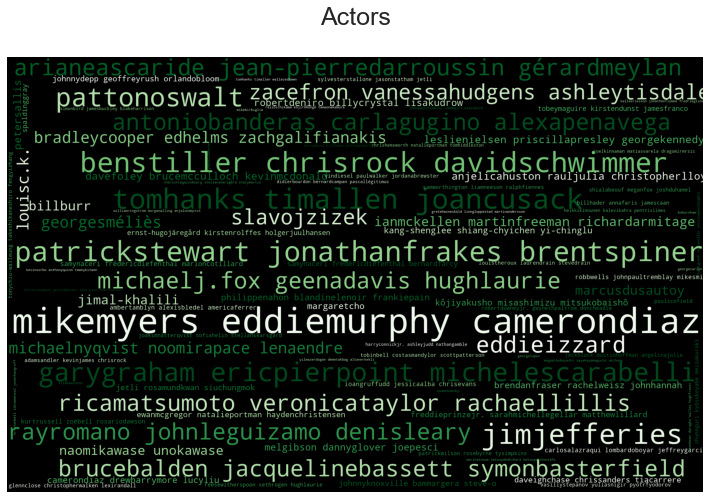

In [27]:
# Generate a wordcloud using the 2000 most frequently occuring actors' names in the dataset
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
actors = wordcloud_generator(df, 'title_cast')

# plot the WordCloud                        
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Actors\n', fontsize=25)
plt.show()

According to the wordcloud, the most frequently searched key words are: Documentary, action, Comedy, sex, and Rated are the most popular movies. Furthermore, we can see that the searched genres are nearly identical to keywords; genres such as Action, Documentary, rated, and so on are prominent in this category. While it is clear that users primarily look for actors such as Eddie Murphy, Cameron Diaz, and Mike Myers. 

### Movie Recommendation Model Based


Model-based approaches include a step that reduces or compresses the large but sparse user-item matrix. An understanding of dimensionality reduction is required to understand how the reduction happens. the advantange of doing dimensionality reduction is that if the matrix is mostly empty, reducing the dimensions can improve the algorithm's performance in terms of both space and time. This can be accomplished through the use of various methods such as matrix factorization or autoencoders.

1. SVD

SVD came into the limelight when matrix factorization was seen performing well in the Netflix prize competition. 
The process of converting one matrix into a product of multiple matrices is known as matrix factorization. It is a very useful and well-studied topic in mathematics. There are several methods for factoring matrices, but singular value decomposition is particularly useful for making recommendations.


2. KNN

A k-means algorithm finds clusters in a multidimensional dataset that is unlabeled. In order to accomplish this, it uses a simple concept of what optimal clustering looks like:
The "cluster center" is the arithmetic mean of all the cluster points.
Compared to other cluster centers, each point is closer to its own cluster center.

In [28]:
# Creating an empty column and list to store the corpus for each movie
df['abc'] = ''
abc = []

# List of the columns we want to use to create our corpus 
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df['movieId'])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    abc.append(words)

# Add the corpus information for each movie to the dataframe 
df['abc'] = abc
df.set_index('movieId', inplace=True)

# Drop the columns we don't need anymore to preserve memory
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head()

,title,abc
movieId,,
1,Toy Story (1995),tomhanks timallen donrickles johnlasseter toy ...
2,Jumanji (1995),robinwilliams jonathanhyde kirstendunst jonath...
3,Grumpier Old Men (1995),waltermatthau jacklemmon sophialoren marksteve...
4,Waiting to Exhale (1995),whitneyhouston angelabassett lorettadevine ter...
5,Father of the Bride Part II (1995),stevemartin dianekeaton martinshort alberthack...


In [29]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['abc'])

In [30]:
cos_sim = cosine_similarity(count_matrix, count_matrix)
print(cos_sim.shape)
cos_sim

(24866, 24866)


array([[1.        , 0.20044593, 0.15811388, ..., 0.06681531, 0.        ,
        0.15075567],
       [0.20044593, 1.        , 0.        , ..., 0.14285714, 0.        ,
        0.16116459],
       [0.15811388, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06681531, 0.14285714, 0.        , ..., 1.        , 0.        ,
        0.0805823 ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15075567, 0.16116459, 0.        , ..., 0.0805823 , 0.        ,
        1.        ]])

In [32]:
# Creating a small test dataframe to evaluate our models
tests = new_df.copy()
tests = tests.head(10000)

# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(tests[['userId','movieId','rating']], reader)

# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1215  1.0763  1.0953  1.1050  1.1318  1.1060  0.0195  
Fit time          1.21    1.29    1.43    2.53    2.03    1.70    0.51    
Test time         0.02    0.02    0.04    0.03    0.03    0.03    0.01    


In [72]:
#Evaluate the model 
svd = SVD(random_state=0)
cv = cross_validate(svd, test_data, cv=5, measures=['RMSE'], verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0304  1.0411  1.0196  1.0126  1.0279  1.0263  0.0097  
Fit time          1.08    0.84    1.03    0.81    1.05    0.96    0.11    
Test time         0.02    0.02    0.01    0.03    0.02    0.02    0.01    


In [74]:
# Train the model on the entire dataset 
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(rating[['userId','movieId','rating']], reader)
trainingSet = data.build_full_trainset()
svd.fit(trainingSet)

# Make predictions using the trained model
pred = [svd.predict(rating.userId[i],rating.movieId[i]).est for i in rating.index]
rating['rating'] = pred

In [76]:
# Create the csv file for submission
rating['Id'] = rating['userId'].astype(str)+'_'+rating['movieId'].astype(str)
rating = rating[['Id','rating']]
rating.to_csv('Team13_submission.csv', index=False)

In [ ]:
## SAVING TRAINED MODEL
from surprise import dump
import os
model_filename = "./model.pickle"
print (">> Starting dump")
# Dump algorithm and reload it.
file_name = os.path.expanduser(model_filename)
dump.dump(file_name, algo=algo)
print (">> Dump done")
print(model_filename)

In [ ]:
#knn
#reader = Reader()
#dataset creation
#data = Dataset.load_from_df(ratings, reader)
#model
#knn = KNNBasic()
#Evaluating the performance in terms of RMSE
#cross_validate(knn, data, measures=[‘RMSE’, ‘mae’], cv = 3)

### Streamlit and Kaggle

<p>Kindly click <a>here</a> to view the deployment of the model live</p>
<p>Click <a>here</a> to view kaggle submissions</p>
<p><a>GitHup repo </a></p>


### Conclusion

We were able to model a collaborative system successfully, with the SVD algorithm outperforming the KNN algorithm. We've had issues with computer memory that have caused processing to be slow. We would have liked to run content filtering and see how it went, but we were unable to do so due to time constraints and slow processing. 



### References

1. En.wikipedia.org. 2022. Long tail - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Long_tail> [Accessed 27 January 2022].
2. Goel, S., Broder, A., Gabrilovich, E. and Pang, B., 2010, February. Anatomy of the long tail: ordinary people with extraordinary tastes. In Proceedings of the third ACM international conference on Web search and data mining (pp. 201-210).
3. Medium. 2022. Recommendation System using collaborative filtering. [online] Available at: <https://medium.com/analytics-vidhya/recommendation-system-using-collaborative-filtering-cc310e641fde> [Accessed 27 January 2022].


In [28]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jtsiri10/movie-recommender-team-13/098fa246315a488694253c85db949e15
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET INFO: All files uploaded, waiting for confirmation they have been all received